In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import random
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('full_data.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [38]:
features = ['age','hypertension','bmi','avg_glucose_level', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
df = pd.get_dummies(df, columns=['smoking_status'], drop_first=True)
X = df[features]
Y = df.stroke
features = X.columns
X

,age,hypertension,bmi,avg_glucose_level,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,36.6,228.69,1,0,0
1,80.0,0,32.5,105.92,0,1,0
2,49.0,0,34.4,171.23,0,0,1
3,79.0,1,24.0,174.12,0,1,0
4,81.0,0,29.0,186.21,1,0,0
...,...,...,...,...,...,...,...
4976,41.0,0,29.8,70.15,1,0,0
4977,40.0,0,31.1,191.15,0,0,1
4978,45.0,1,31.8,95.02,0,0,1
4979,40.0,0,30.0,83.94,0,0,1


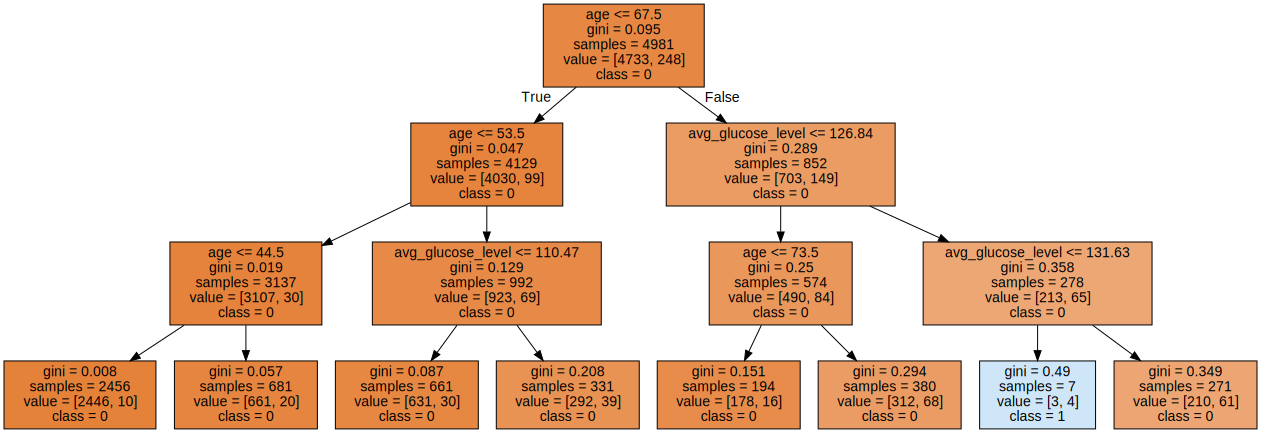

Sample patient 15 to test on. Tree classified as [0]


/home/carson2stoker/.local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


gender                             Female
age                                  60.0
hypertension                            0
heart_disease                           0
ever_married                           No
work_type                         Private
Residence_type                      Urban
avg_glucose_level                   89.22
bmi                                  37.8
stroke                                  1
smoking_status_formerly smoked          0
smoking_status_never smoked             1
smoking_status_smokes                   0
Name: 15, dtype: object

In [39]:

# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, Y)

# # # # create a Graphviz file
# # # with open("heart.dot", 'w') as f:
# # #     f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=['0', '1'], filled = True)

graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=features,
                                    class_names=['0', '1'], filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

# Get a random sample to see how it does
n = df.shape[0]
# i = random.randint(0, n)
# i = 254 # an interesting case
i = 15 # an interesting case
sample = df.iloc[i]
print('Sample patient {} to test on. Tree classified as {}'.format(i, treeclf.predict([sample[features]])))
display(sample)